### Analyzing S&P 500 Futures Logarithmic Returns Distribution with Standard Deviation Lines

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib widget

ticker = "ES=F"
dataset = yf.download(ticker)
sp500= pd.DataFrame(dataset)
sp500

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2024-01-22,2021.300049,2021.300049,2019.800049,2019.800049,2019.800049,12
2024-01-23,2030.300049,2030.300049,2022.500000,2023.699951,2023.699951,15
2024-01-24,2023.199951,2033.199951,2013.900024,2013.900024,2013.900024,253


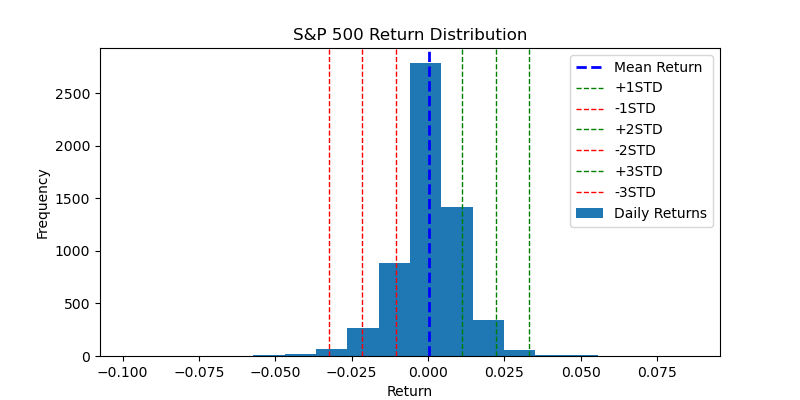

In [29]:
sp500['log_return'] = np.log(sp500['Adj Close']).diff()

max_log_return = sp500.log_return.max()
min_log_return = sp500.log_return.min()

n_bins = int((max_log_return-min_log_return)*100)

volatility = sp500.log_return.std()
mean_return = sp500.log_return.mean()

plt.figure(figsize=(8,4))
plt.title("S&P 500 Return Distribution")
plt.hist(sp500.log_return, bins=n_bins, label = "Daily Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.axvline(mean_return, label = "Mean Return", color = "blue", linestyle = "dashed", linewidth = 2)
for i in range(1,4):
    plt.axvline(mean_return + i * volatility, color = "green", linestyle = "dashed", linewidth = 1, label = f"+{i}STD" )
    plt.axvline(mean_return - i * volatility, color = "red", linestyle = "dashed", linewidth = 1, label = f"-{i}STD")
plt.legend()
plt.show()